In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [2]:
def svd(matrix):
    matrix_tr = matrix.T
    # find S and V matrixs from AT*A
    AT_A = np.dot(matrix_tr,matrix)
    eigVal,eigVec = np.linalg.eig(AT_A)
    # sort upper to lower
    idx = np.argsort(eigVal)[::-1]
    eigVal = eigVal[idx]
    eigVec = eigVec[:,idx]
    # make S matrix with zeros
    S = np.zeros((matrix.shape[0],matrix.shape[1]))
    np.fill_diagonal(S, np.sqrt(eigVal))
    # V matrix ---> AT*A eigen Vectors
    V = np.array(eigVec)
    #find U matrix from A*AT
    A_AT = np.dot(matrix, matrix_tr)
    eigVal,eigVec = np.linalg.eig(A_AT)
    # sort upper to lower
    idx = np.argsort(eigVal)[::-1]
    eigVal = eigVal[idx]
    eigVec = eigVec[:,idx]
    # U matrix ---> A*AT eigen Vectors
    U = np.array(eigVec)

    return np.real(U),np.real(S),np.real(V.T)


In [3]:
def openner(dir):
    files = os.listdir(dir)
    image_files = sorted([file for file in files if file.endswith(".jpg")])
    image_path = os.path.join(dir,image_files[0])
    img = Image.open(image_path)
    faces_dataSet = np.zeros((len(image_files), np.prod(np.array(img).shape)), dtype=np.uint8)

    for i,image in enumerate(image_files):
        image_path = os.path.join(dir,image)
        img = Image.open(image_path)

        img_array = np.array(img)
        flatten_img = img_array.flatten()
        faces_dataSet[i] = flatten_img
    m, n = img_array.shape
    faces_dataSet = np.array(faces_dataSet)
    return faces_dataSet,m,n

In [4]:
def detector(faces,data_set,U,m,n,k):
   plt.figure(figsize=(5, 5))
   U_K = U[:,:k]
   All_eigen_faces = np.dot(faces,U_K)
   for face in data_set:
      eigenFace =  np.dot(face,U_K)
      distances = np.linalg.norm(All_eigen_faces - eigenFace, axis=1)

      # Find the index of the nearest face
      nearest_face_index = np.argmin(distances)

      # Show the nearest face
      nearest_face = faces[nearest_face_index]
         
      plt.figure(figsize=(5, 2))
      plt.subplot(1, 3, 1)
      plt.title("Selected Face")
      plt.imshow(face.reshape(m, n), cmap="gray")
      plt.axis("off")

      created_face = U @ (U.T @ face)
      plt.subplot(1, 3, 2)
      plt.title("Created Face")
      plt.imshow(created_face.reshape(m, n), cmap="gray")
      plt.axis("off")

      plt.subplot(1, 3, 3)
      plt.title("Nearest Face")
      plt.imshow(nearest_face.reshape(m, n), cmap="gray")
      plt.axis("off")
   plt.show()

/tmp/ipykernel_8070/3412274505.py:12: RuntimeWarning: invalid value encountered in sqrt
  np.fill_diagonal(S, np.sqrt(eigVal))
/tmp/ipykernel_8070/4113562610.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 2))


<Figure size 500x500 with 0 Axes>

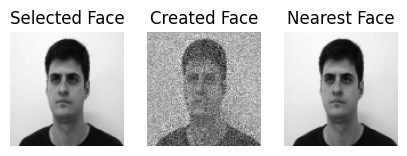

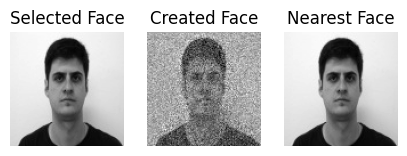

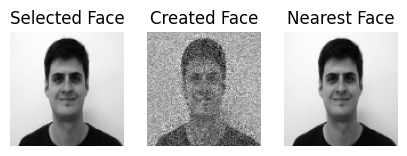

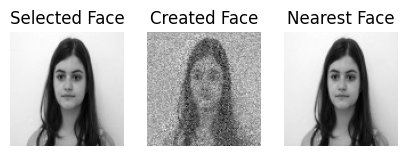

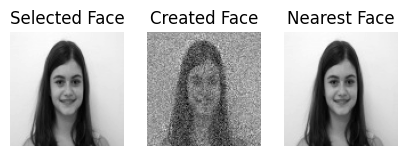

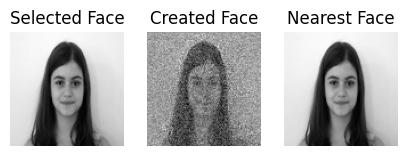

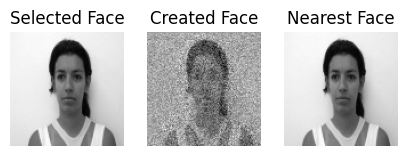

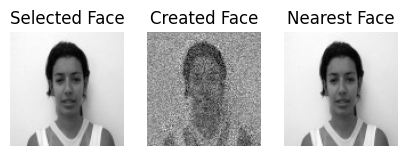

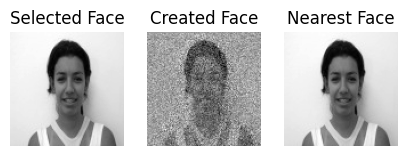

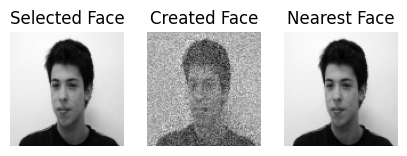

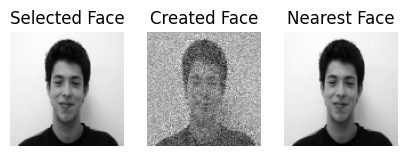

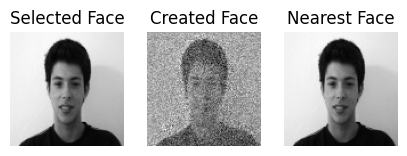

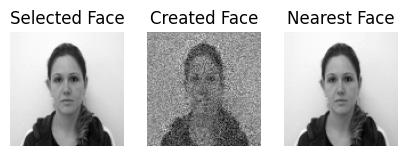

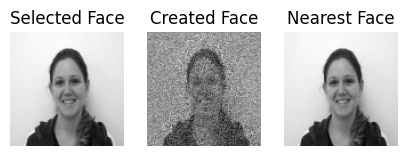

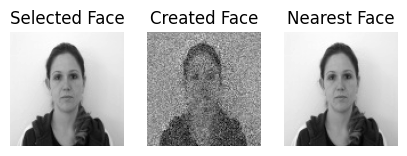

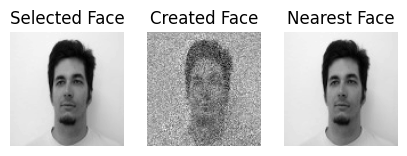

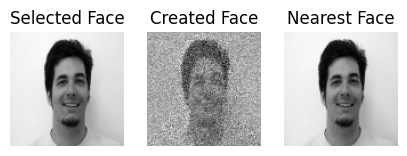

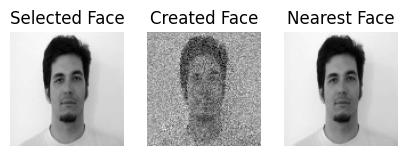

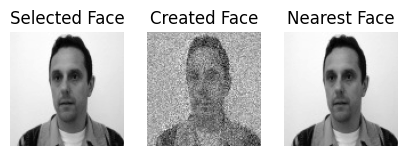

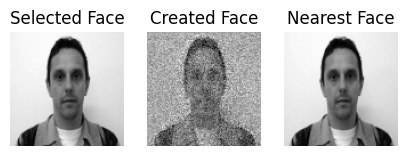

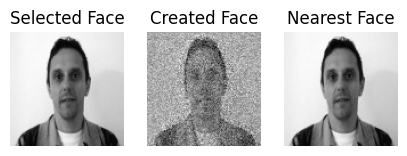

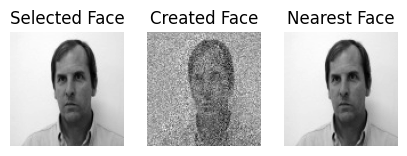

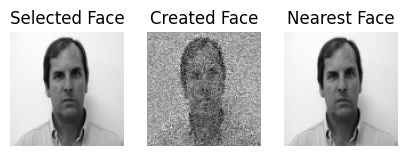

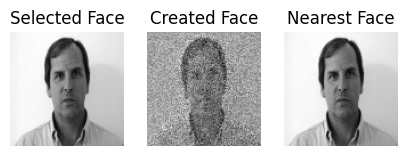

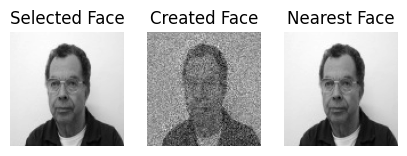

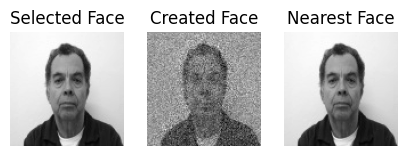

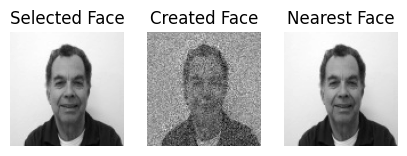

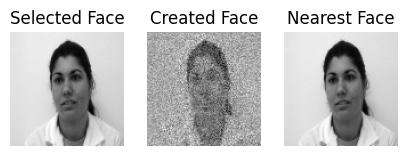

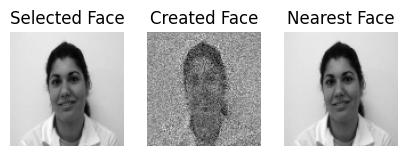

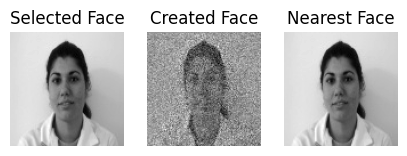

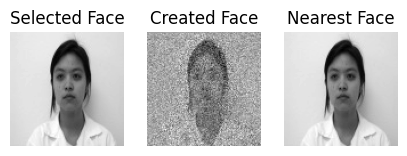

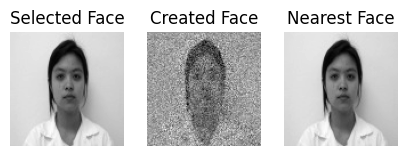

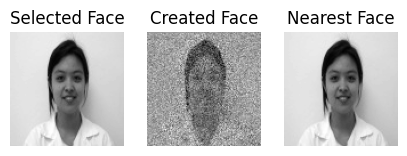

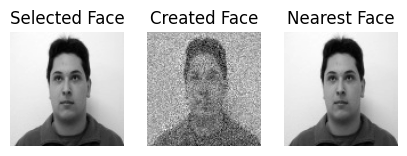

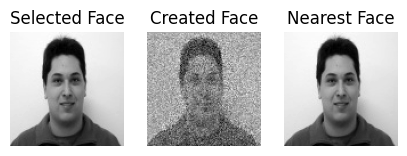

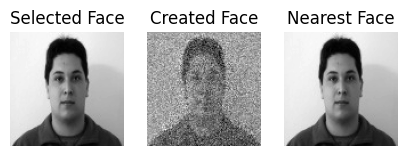

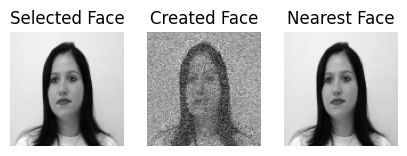

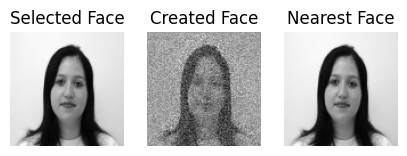

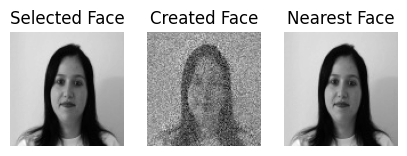

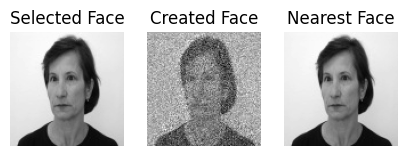

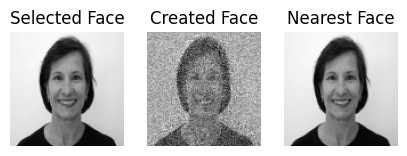

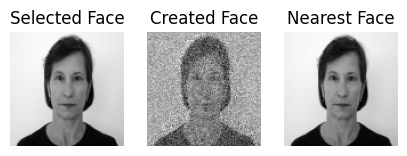

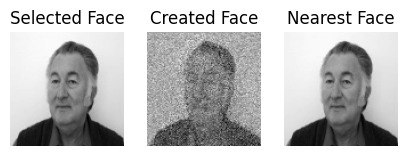

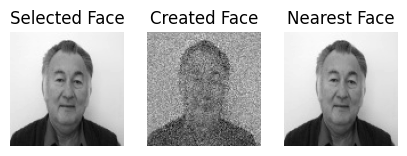

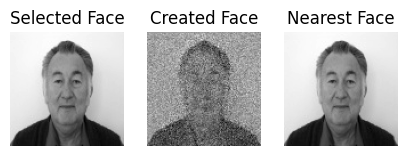

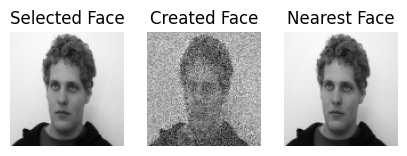

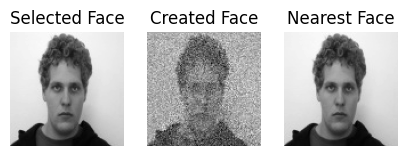

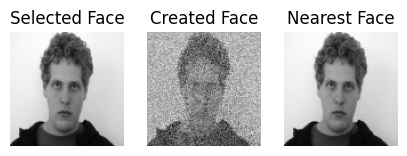

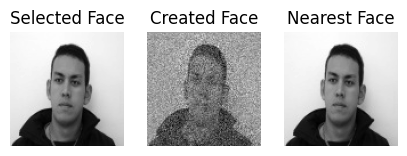

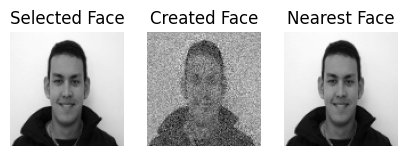

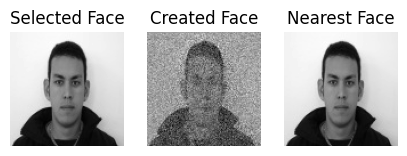

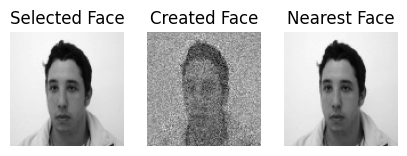

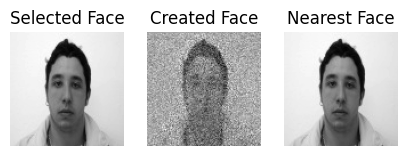

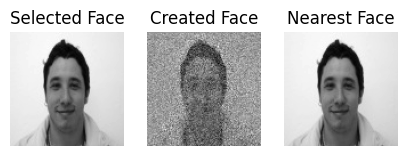

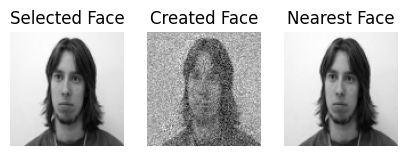

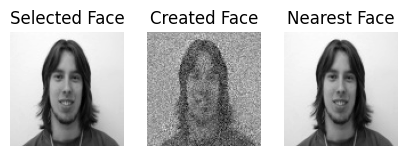

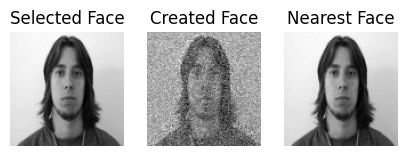

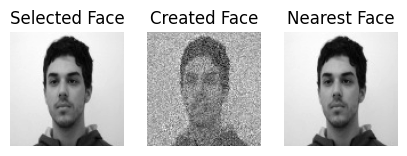

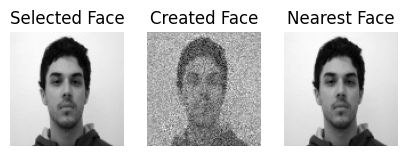

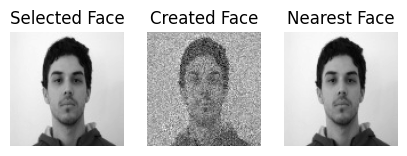

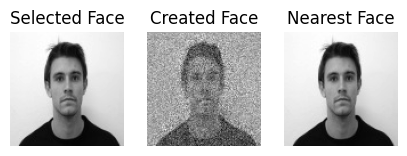

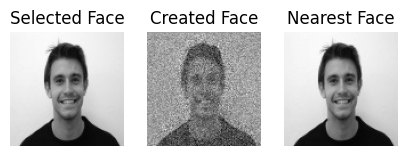

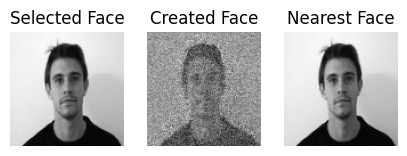

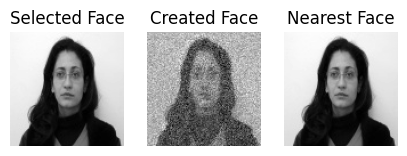

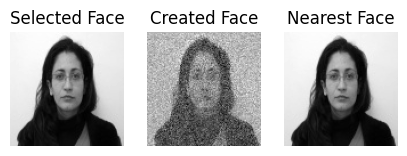

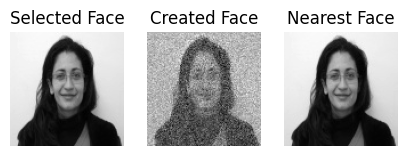

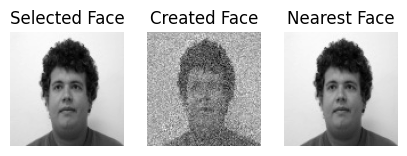

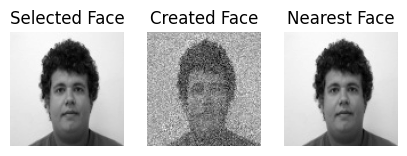

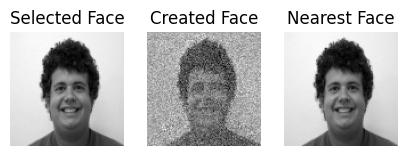

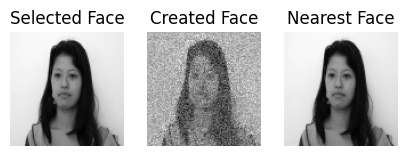

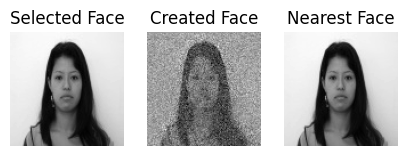

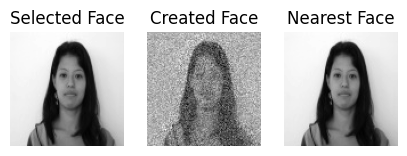

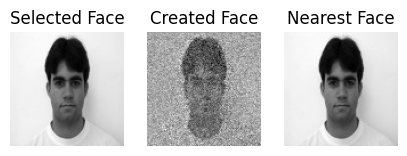

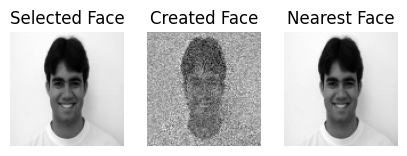

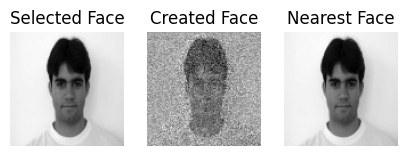

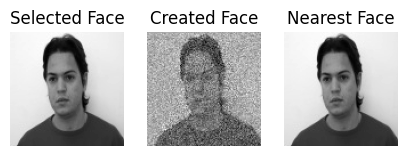

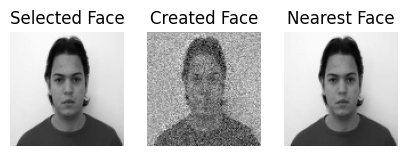

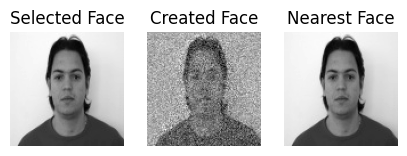

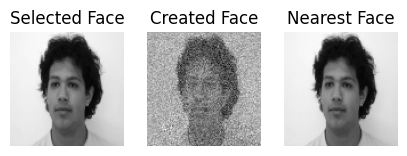

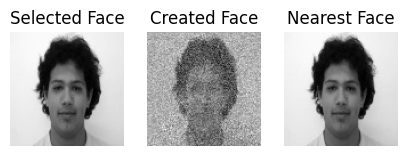

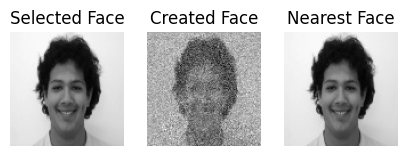

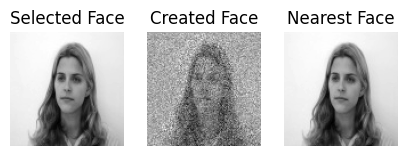

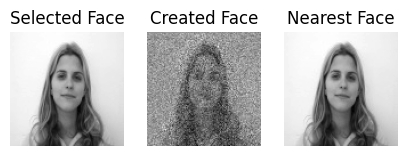

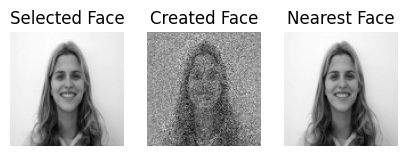

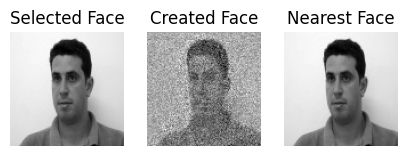

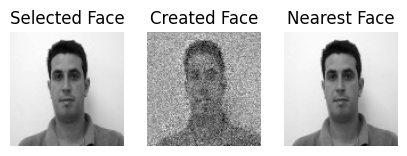

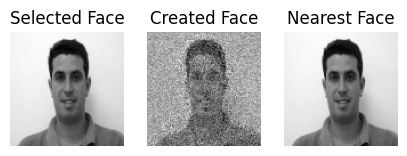

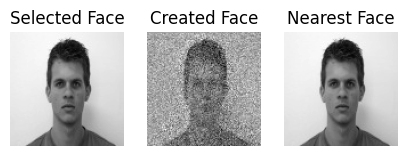

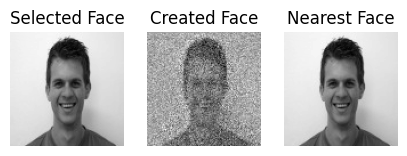

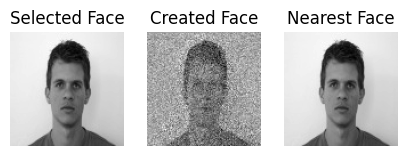

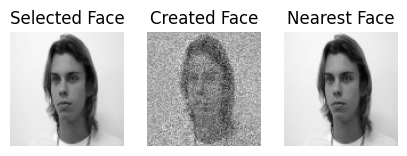

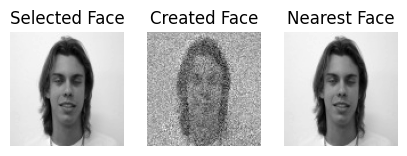

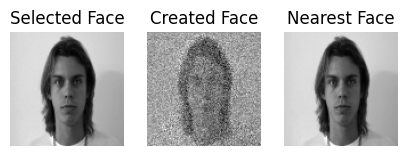

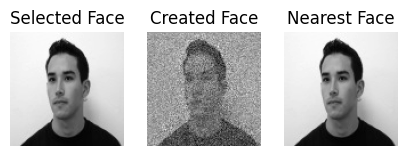

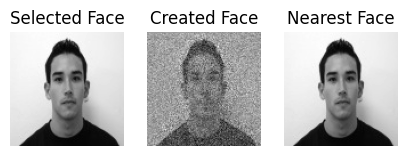

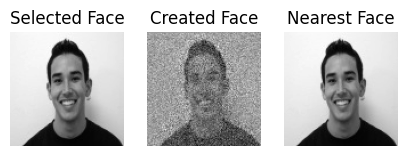

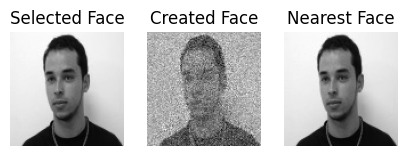

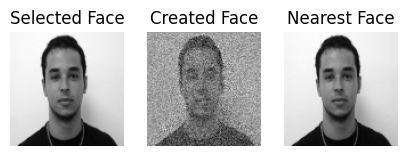

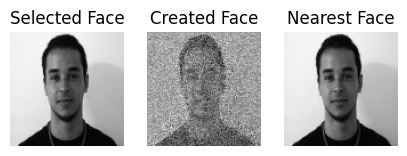

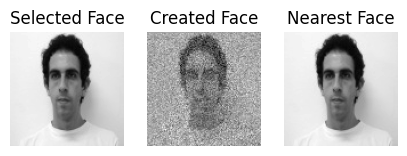

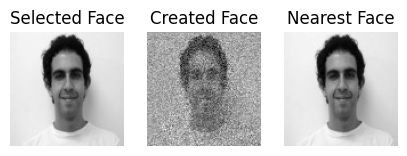

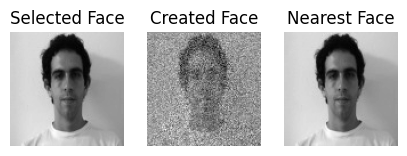

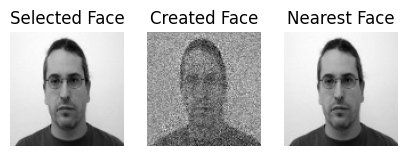

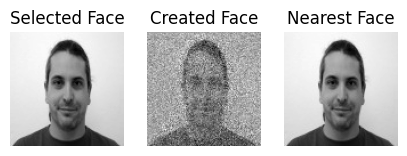

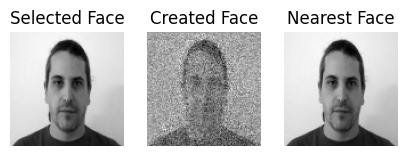

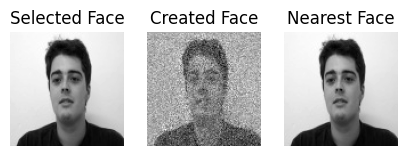

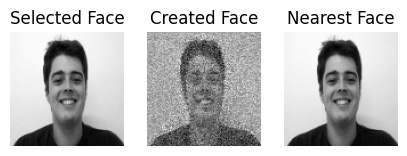

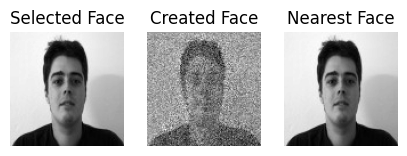

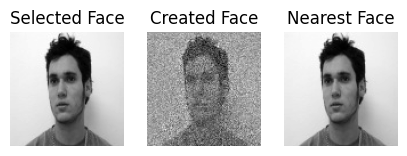

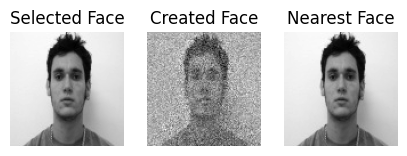

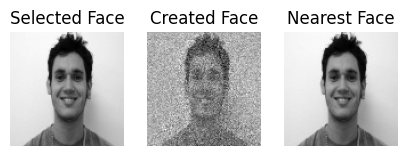

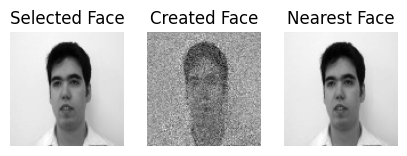

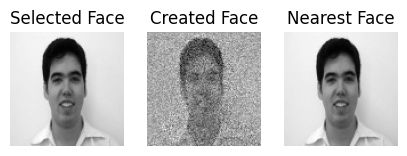

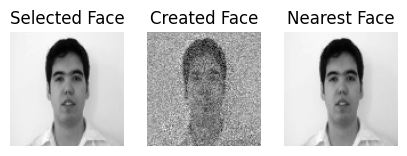

In [5]:
DataSet_faces, m, n = openner("Dataset")
mean_face = np.mean(DataSet_faces,axis=0)


faces = DataSet_faces - mean_face
U,S,VT = svd(faces.T)


k=50
detector(DataSet_faces,DataSet_faces,U,m,n,k)

/tmp/ipykernel_8070/4113562610.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 2))


<Figure size 500x500 with 0 Axes>

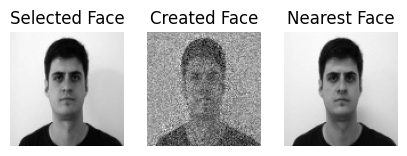

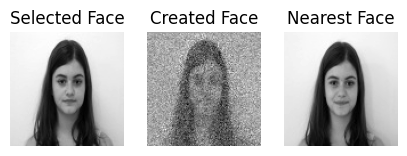

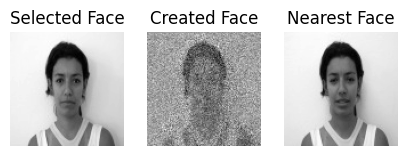

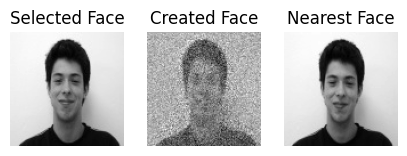

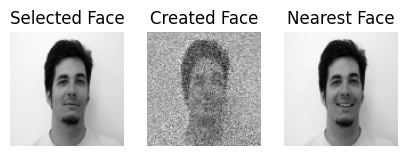

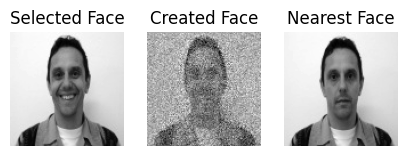

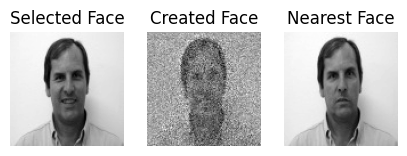

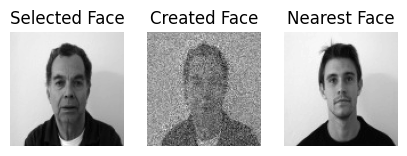

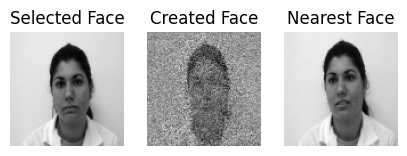

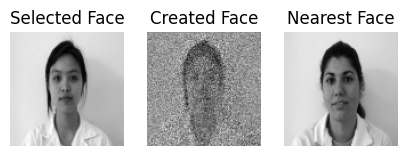

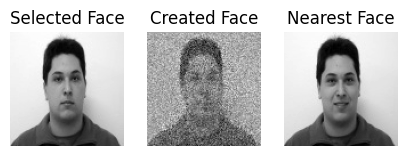

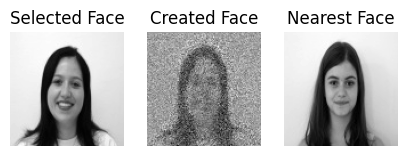

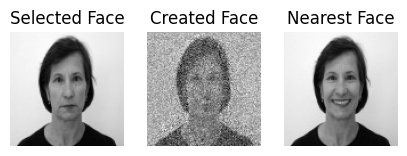

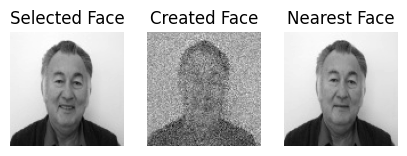

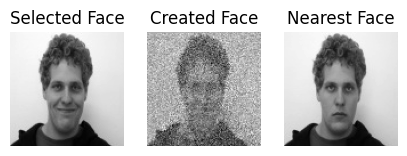

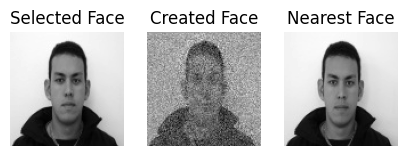

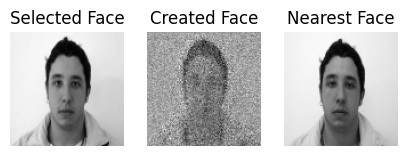

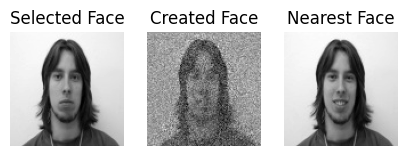

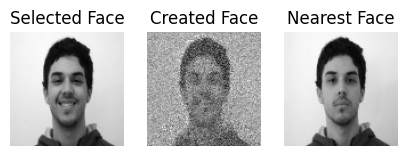

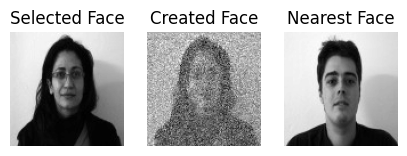

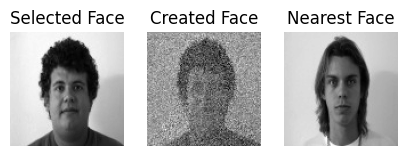

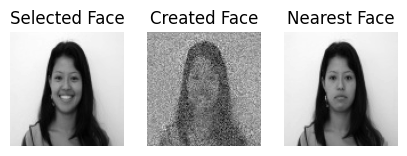

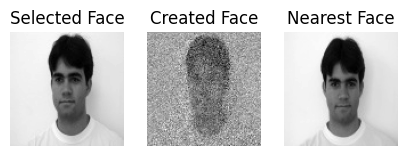

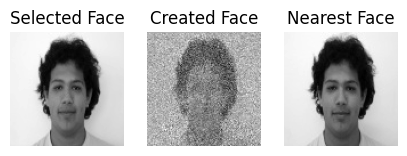

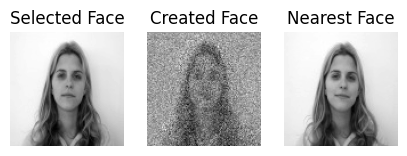

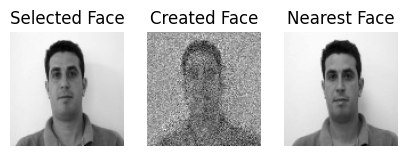

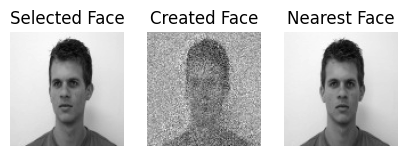

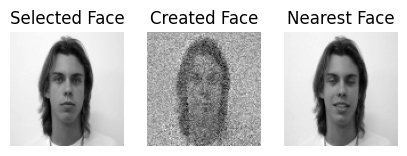

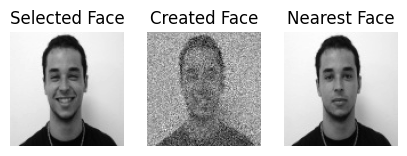

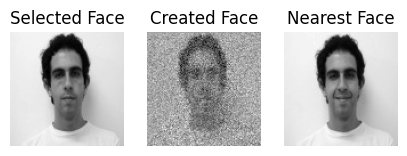

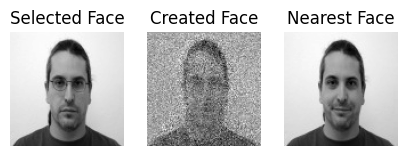

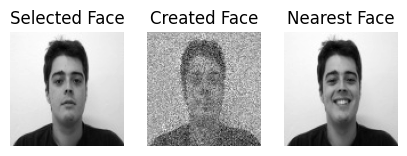

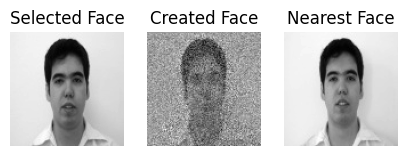

In [6]:
test_faces, m, n = openner("Testset")

detector(DataSet_faces,test_faces,U,m,n,50)